## Import functions and metrics

In [84]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import time

# Dummy
from sklearn.dummy import DummyRegressor

# Ensemble
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

# Linear
## Classical linear regressors
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor

## Regressors with variable selection
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso

## Bayesian regressors
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge

## Outlier-robust regressors
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import TheilSenRegressor

## Generalized linear models (GLM) for regression
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import GammaRegressor

## Miscellaneous
from sklearn.linear_model import PassiveAggressiveRegressor

# Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor

# SVM
from sklearn.svm import LinearSVR

# Decision Trees
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor

# Metrics
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import validation_curve

import matplotlib.pyplot as plt 

## Import data and split

In [3]:
def describe(arr):
    # measures of central tendency
    mean = np.mean(arr)
    median = np.median(arr)

    # measures of dispersion
    min = np.amin(arr)
    max = np.amax(arr)
    range = np.ptp(arr)
    variance = np.var(arr)
    sd = np.std(arr)

    print("Descriptive analysis")
    print("Array =", arr)
    print("Measures of Central Tendency")
    print("Mean =", mean)
    print("Median =", median)
    print("Measures of Dispersion")
    print("Minimum =", min)
    print("Maximum =", max)
    print("Range =", range)
    print("Variance =", variance)
    print("Standard Deviation =", sd)
    print("(M, N) = (", len(arr), ",", (len(arr[0]) if type(arr[0]) == np.ndarray else 1), ")")

In [3]:
train_data = pd.read_csv('../data/train_data.csv', index_col=False)
test_data = pd.read_csv('../data/test_data.csv', index_col=False)
# train_data = scale(train_data)
# test_data = scale(test_data)
X_train = train_data.drop(['Zori', 'State','CityID'], axis=1).to_numpy()
# X_train = train_data.drop(['Zori', 'State', 'Year','Ada','Adams','Alameda','Allegheny','Anne Arundel','Anoka','Arapahoe','Atlantic','Baldwin','Baltimore','Bay','Beaver','Bell','Benton','Bergen','Bexar','Boone','Boulder','Brazoria','Brevard','Bristol','Broward','Bucks','Burlington','Butler','Camden','Campbell','Carroll','Cass','Chatham','Chester','Chesterfield','Clackamas','Clark','Clay','Clayton','Cobb','Collin','Columbia','Contra Costa','Cook','Cumberland','Cuyahoga','Dakota','Dallas','Dane','Davis','DeSoto','Dekalb','Delaware','Denton','Douglas','DuPage','El Paso','Erie','Essex','Fairfax','Fairfield','Fayette','Fort Bend','Franklin','Fulton','Galveston','Gaston','Greene','Greenville','Gwinnett','Hamilton','Hancock','Harford','Harnett','Harris','Hartford','Hennepin','Henrico','Hidalgo','Hillsborough','Honolulu','Howard','Hudson','Jackson','Jefferson','Jefferson Parish','Johnson','Kane','Kendall','Kent','Kenton','King','Kitsap','Lake','Lancaster','Lee','Lehigh','Lexington','Los Angeles','Loudoun','Macomb','Madison','Manatee','Maricopa','Marin','Marion','Mecklenburg','Mercer','Miami-Dade','Middlesex','Milwaukee','Monmouth','Monroe','Monterey','Montgomery','Morris','Nassau','New Castle','New Haven','New London','Norfolk','Oakland','Okaloosa','Oklahoma','Onondaga','Orange','Osceola','Palm Beach','Pasco','Passaic','Pierce','Pima','Pinal','Pinellas','Placer','Plymouth','Polk','Prince Georges','Prince William','Providence','Pulaski','Ramsey','Richland','Riverside','Rockingham','Sacramento','Saint Charles','Saint Clair','Saint Johns','Saint Louis','Salt Lake','San Bernardino','San Diego','San Joaquin','San Luis Obispo','San Mateo','Santa Barbara','Santa Clara','Santa Cruz','Sarasota','Scott','Seminole','Shelby','Snohomish','Solano','Somerset','Sonoma','Stark','Suffolk','Summit','Tarrant','Travis','Tulsa','Union','Utah','Ventura','Volusia','Wake','Walton','Warren','Washington','Wayne','Weber','Weld','Westchester','Westmoreland','Will','Williamson','Winnebago','Worcester','York'], axis=1)
# X_train = train_data.drop(['Zori', 'State', 'Year','Ada','Adams','Alameda','Allegheny','Anne Arundel','Anoka','Arapahoe','Atlantic','Baldwin','Baltimore','Bay','Beaver','Bell','Benton','Bergen','Bexar','Boone','Boulder','Brazoria','Brevard','Bristol','Broward','Bucks','Burlington','Butler','Camden','Campbell','Carroll','Cass','Chatham','Chester','Chesterfield','Clackamas','Clark','Clay','Clayton','Cobb','Collin','Columbia','Contra Costa','Cook','Cumberland','Cuyahoga','Dakota','Dallas','Dane','Davis','DeSoto','Dekalb','Delaware','Denton','Douglas','DuPage','El Paso','Erie','Essex','Fairfax','Fairfield','Fayette','Fort Bend','Franklin','Fulton','Galveston','Gaston','Greene','Greenville','Gwinnett','Hamilton','Hancock','Harford','Harnett','Harris','Hartford','Hennepin','Henrico','Hidalgo','Hillsborough','Honolulu','Howard','Hudson','Jackson','Jefferson','Jefferson Parish','Johnson','Kane','Kendall','Kent','Kenton','King','Kitsap','Lake','Lancaster','Lee','Lehigh','Lexington','Los Angeles','Loudoun','Macomb','Madison','Manatee','Maricopa','Marin','Marion','Mecklenburg','Mercer','Miami-Dade','Middlesex','Milwaukee','Monmouth','Monroe','Monterey','Montgomery','Morris','Nassau','New Castle','New Haven','New London','Norfolk','Oakland','Okaloosa','Oklahoma','Onondaga','Orange','Osceola','Palm Beach','Pasco','Passaic','Pierce','Pima','Pinal','Pinellas','Placer','Plymouth','Polk','Prince Georges','Prince William','Providence','Pulaski','Ramsey','Richland','Riverside','Rockingham','Sacramento','Saint Charles','Saint Clair','Saint Johns','Saint Louis','Salt Lake','San Bernardino','San Diego','San Joaquin','San Luis Obispo','San Mateo','Santa Barbara','Santa Clara','Santa Cruz','Sarasota','Scott','Seminole','Shelby','Snohomish','Solano','Somerset','Sonoma','Stark','Suffolk','Summit','Tarrant','Travis','Tulsa','Union','Utah','Ventura','Volusia','Wake','Walton','Warren','Washington','Wayne','Weber','Weld','Westchester','Westmoreland','Will','Williamson','Winnebago','Worcester','York','violent_crime','homicide','rape','robbery','aggravated_assault','Per Capita (dollars)','property_crime','burglary','larceny','motor_vehicle_theft','Unemployment Rates'], axis=1)
# X_train = train_data.drop(['Zori', 'State', 'Year','Ada','Adams','Alameda','Allegheny','Anne Arundel','Anoka','Arapahoe','Atlantic','Baldwin','Baltimore','Bay','Beaver','Bell','Benton','Bergen','Bexar','Boone','Boulder','Brazoria','Brevard','Bristol','Broward','Bucks','Burlington','Butler','Camden','Campbell','Carroll','Cass','Chatham','Chester','Chesterfield','Clackamas','Clark','Clay','Clayton','Cobb','Collin','Columbia','Contra Costa','Cook','Cumberland','Cuyahoga','Dakota','Dallas','Dane','Davis','DeSoto','Dekalb','Delaware','Denton','Douglas','DuPage','El Paso','Erie','Essex','Fairfax','Fairfield','Fayette','Fort Bend','Franklin','Fulton','Galveston','Gaston','Greene','Greenville','Gwinnett','Hamilton','Hancock','Harford','Harnett','Harris','Hartford','Hennepin','Henrico','Hidalgo','Hillsborough','Honolulu','Howard','Hudson','Jackson','Jefferson','Jefferson Parish','Johnson','Kane','Kendall','Kent','Kenton','King','Kitsap','Lake','Lancaster','Lee','Lehigh','Lexington','Los Angeles','Loudoun','Macomb','Madison','Manatee','Maricopa','Marin','Marion','Mecklenburg','Mercer','Miami-Dade','Middlesex','Milwaukee','Monmouth','Monroe','Monterey','Montgomery','Morris','Nassau','New Castle','New Haven','New London','Norfolk','Oakland','Okaloosa','Oklahoma','Onondaga','Orange','Osceola','Palm Beach','Pasco','Passaic','Pierce','Pima','Pinal','Pinellas','Placer','Plymouth','Polk','Prince Georges','Prince William','Providence','Pulaski','Ramsey','Richland','Riverside','Rockingham','Sacramento','Saint Charles','Saint Clair','Saint Johns','Saint Louis','Salt Lake','San Bernardino','San Diego','San Joaquin','San Luis Obispo','San Mateo','Santa Barbara','Santa Clara','Santa Cruz','Sarasota','Scott','Seminole','Shelby','Snohomish','Solano','Somerset','Sonoma','Stark','Suffolk','Summit','Tarrant','Travis','Tulsa','Union','Utah','Ventura','Volusia','Wake','Walton','Warren','Washington','Wayne','Weber','Weld','Westchester','Westmoreland','Will','Williamson','Winnebago','Worcester','York','violent_crime','homicide','rape','robbery','aggravated_assault','Per Capita (dollars)','property_crime','burglary','larceny','motor_vehicle_theft','Unemployment Rates'], axis=1).to_numpy()
# X_train = train_data.drop(['CityID', 'Zori', 'State', 'Year','Ada','Adams','Alameda','Allegheny','Anne Arundel','Anoka','Arapahoe','Atlantic','Baldwin','Baltimore','Bay','Beaver','Bell','Benton','Bergen','Bexar','Boone','Boulder','Brazoria','Brevard','Bristol','Broward','Bucks','Burlington','Butler','Camden','Campbell','Carroll','Cass','Chatham','Chester','Chesterfield','Clackamas','Clark','Clay','Clayton','Cobb','Collin','Columbia','Contra Costa','Cook','Cumberland','Cuyahoga','Dakota','Dallas','Dane','Davis','DeSoto','Dekalb','Delaware','Denton','Douglas','DuPage','El Paso','Erie','Essex','Fairfax','Fairfield','Fayette','Fort Bend','Franklin','Fulton','Galveston','Gaston','Greene','Greenville','Gwinnett','Hamilton','Hancock','Harford','Harnett','Harris','Hartford','Hennepin','Henrico','Hidalgo','Hillsborough','Honolulu','Howard','Hudson','Jackson','Jefferson','Jefferson Parish','Johnson','Kane','Kendall','Kent','Kenton','King','Kitsap','Lake','Lancaster','Lee','Lehigh','Lexington','Los Angeles','Loudoun','Macomb','Madison','Manatee','Maricopa','Marin','Marion','Mecklenburg','Mercer','Miami-Dade','Middlesex','Milwaukee','Monmouth','Monroe','Monterey','Montgomery','Morris','Nassau','New Castle','New Haven','New London','Norfolk','Oakland','Okaloosa','Oklahoma','Onondaga','Orange','Osceola','Palm Beach','Pasco','Passaic','Pierce','Pima','Pinal','Pinellas','Placer','Plymouth','Polk','Prince Georges','Prince William','Providence','Pulaski','Ramsey','Richland','Riverside','Rockingham','Sacramento','Saint Charles','Saint Clair','Saint Johns','Saint Louis','Salt Lake','San Bernardino','San Diego','San Joaquin','San Luis Obispo','San Mateo','Santa Barbara','Santa Clara','Santa Cruz','Sarasota','Scott','Seminole','Shelby','Snohomish','Solano','Somerset','Sonoma','Stark','Suffolk','Summit','Tarrant','Travis','Tulsa','Union','Utah','Ventura','Volusia','Wake','Walton','Warren','Washington','Wayne','Weber','Weld','Westchester','Westmoreland','Will','Williamson','Winnebago','Worcester','York','violent_crime','homicide','rape','robbery','aggravated_assault','Per Capita (dollars)','property_crime','burglary','larceny','motor_vehicle_theft','Unemployment Rates'], axis=1).to_numpy()
# X_train = np.append(train_data.drop(['CityID', 'Zori', 'State', 'Year','Ada','Adams','Alameda','Allegheny','Anne Arundel','Anoka','Arapahoe','Atlantic','Baldwin','Baltimore','Bay','Beaver','Bell','Benton','Bergen','Bexar','Boone','Boulder','Brazoria','Brevard','Bristol','Broward','Bucks','Burlington','Butler','Camden','Campbell','Carroll','Cass','Chatham','Chester','Chesterfield','Clackamas','Clark','Clay','Clayton','Cobb','Collin','Columbia','Contra Costa','Cook','Cumberland','Cuyahoga','Dakota','Dallas','Dane','Davis','DeSoto','Dekalb','Delaware','Denton','Douglas','DuPage','El Paso','Erie','Essex','Fairfax','Fairfield','Fayette','Fort Bend','Franklin','Fulton','Galveston','Gaston','Greene','Greenville','Gwinnett','Hamilton','Hancock','Harford','Harnett','Harris','Hartford','Hennepin','Henrico','Hidalgo','Hillsborough','Honolulu','Howard','Hudson','Jackson','Jefferson','Jefferson Parish','Johnson','Kane','Kendall','Kent','Kenton','King','Kitsap','Lake','Lancaster','Lee','Lehigh','Lexington','Los Angeles','Loudoun','Macomb','Madison','Manatee','Maricopa','Marin','Marion','Mecklenburg','Mercer','Miami-Dade','Middlesex','Milwaukee','Monmouth','Monroe','Monterey','Montgomery','Morris','Nassau','New Castle','New Haven','New London','Norfolk','Oakland','Okaloosa','Oklahoma','Onondaga','Orange','Osceola','Palm Beach','Pasco','Passaic','Pierce','Pima','Pinal','Pinellas','Placer','Plymouth','Polk','Prince Georges','Prince William','Providence','Pulaski','Ramsey','Richland','Riverside','Rockingham','Sacramento','Saint Charles','Saint Clair','Saint Johns','Saint Louis','Salt Lake','San Bernardino','San Diego','San Joaquin','San Luis Obispo','San Mateo','Santa Barbara','Santa Clara','Santa Cruz','Sarasota','Scott','Seminole','Shelby','Snohomish','Solano','Somerset','Sonoma','Stark','Suffolk','Summit','Tarrant','Travis','Tulsa','Union','Utah','Ventura','Volusia','Wake','Walton','Warren','Washington','Wayne','Weber','Weld','Westchester','Westmoreland','Will','Williamson','Winnebago','Worcester','York','violent_crime','homicide','rape','robbery','aggravated_assault','Per Capita (dollars)','property_crime','burglary','larceny','motor_vehicle_theft','Unemployment Rates'], axis=1).to_numpy(), np.reshape(train_data['CityID'].to_numpy(), (-1, 1)), 1)
y_train = train_data['Zori'].to_numpy()

X_train = scale(X_train)
y_train = scale(y_train)
# X_train = normalize(X_train, axis=0 )
# y_train = normalize(y_train)

X_train = np.append(X_train, np.reshape(train_data['CityID'].to_numpy(), (-1, 1)), 1)

X_test = test_data.drop(['Zori','State','CityID'], axis=1)
# X_test = test_data.drop(['Zori', 'State', 'Year','Ada','Adams','Alameda','Allegheny','Anne Arundel','Anoka','Arapahoe','Atlantic','Baldwin','Baltimore','Bay','Beaver','Bell','Benton','Bergen','Bexar','Boone','Boulder','Brazoria','Brevard','Bristol','Broward','Bucks','Burlington','Butler','Camden','Campbell','Carroll','Cass','Chatham','Chester','Chesterfield','Clackamas','Clark','Clay','Clayton','Cobb','Collin','Columbia','Contra Costa','Cook','Cumberland','Cuyahoga','Dakota','Dallas','Dane','Davis','DeSoto','Dekalb','Delaware','Denton','Douglas','DuPage','El Paso','Erie','Essex','Fairfax','Fairfield','Fayette','Fort Bend','Franklin','Fulton','Galveston','Gaston','Greene','Greenville','Gwinnett','Hamilton','Hancock','Harford','Harnett','Harris','Hartford','Hennepin','Henrico','Hidalgo','Hillsborough','Honolulu','Howard','Hudson','Jackson','Jefferson','Jefferson Parish','Johnson','Kane','Kendall','Kent','Kenton','King','Kitsap','Lake','Lancaster','Lee','Lehigh','Lexington','Los Angeles','Loudoun','Macomb','Madison','Manatee','Maricopa','Marin','Marion','Mecklenburg','Mercer','Miami-Dade','Middlesex','Milwaukee','Monmouth','Monroe','Monterey','Montgomery','Morris','Nassau','New Castle','New Haven','New London','Norfolk','Oakland','Okaloosa','Oklahoma','Onondaga','Orange','Osceola','Palm Beach','Pasco','Passaic','Pierce','Pima','Pinal','Pinellas','Placer','Plymouth','Polk','Prince Georges','Prince William','Providence','Pulaski','Ramsey','Richland','Riverside','Rockingham','Sacramento','Saint Charles','Saint Clair','Saint Johns','Saint Louis','Salt Lake','San Bernardino','San Diego','San Joaquin','San Luis Obispo','San Mateo','Santa Barbara','Santa Clara','Santa Cruz','Sarasota','Scott','Seminole','Shelby','Snohomish','Solano','Somerset','Sonoma','Stark','Suffolk','Summit','Tarrant','Travis','Tulsa','Union','Utah','Ventura','Volusia','Wake','Walton','Warren','Washington','Wayne','Weber','Weld','Westchester','Westmoreland','Will','Williamson','Winnebago','Worcester','York','violent_crime','homicide','rape','robbery','aggravated_assault','Per Capita (dollars)','property_crime','burglary','larceny','motor_vehicle_theft','Unemployment Rates'], axis=1).to_numpy()
# X_test = np.append(test_data.drop(['CityID', 'Zori', 'State', 'Year','Ada','Adams','Alameda','Allegheny','Anne Arundel','Anoka','Arapahoe','Atlantic','Baldwin','Baltimore','Bay','Beaver','Bell','Benton','Bergen','Bexar','Boone','Boulder','Brazoria','Brevard','Bristol','Broward','Bucks','Burlington','Butler','Camden','Campbell','Carroll','Cass','Chatham','Chester','Chesterfield','Clackamas','Clark','Clay','Clayton','Cobb','Collin','Columbia','Contra Costa','Cook','Cumberland','Cuyahoga','Dakota','Dallas','Dane','Davis','DeSoto','Dekalb','Delaware','Denton','Douglas','DuPage','El Paso','Erie','Essex','Fairfax','Fairfield','Fayette','Fort Bend','Franklin','Fulton','Galveston','Gaston','Greene','Greenville','Gwinnett','Hamilton','Hancock','Harford','Harnett','Harris','Hartford','Hennepin','Henrico','Hidalgo','Hillsborough','Honolulu','Howard','Hudson','Jackson','Jefferson','Jefferson Parish','Johnson','Kane','Kendall','Kent','Kenton','King','Kitsap','Lake','Lancaster','Lee','Lehigh','Lexington','Los Angeles','Loudoun','Macomb','Madison','Manatee','Maricopa','Marin','Marion','Mecklenburg','Mercer','Miami-Dade','Middlesex','Milwaukee','Monmouth','Monroe','Monterey','Montgomery','Morris','Nassau','New Castle','New Haven','New London','Norfolk','Oakland','Okaloosa','Oklahoma','Onondaga','Orange','Osceola','Palm Beach','Pasco','Passaic','Pierce','Pima','Pinal','Pinellas','Placer','Plymouth','Polk','Prince Georges','Prince William','Providence','Pulaski','Ramsey','Richland','Riverside','Rockingham','Sacramento','Saint Charles','Saint Clair','Saint Johns','Saint Louis','Salt Lake','San Bernardino','San Diego','San Joaquin','San Luis Obispo','San Mateo','Santa Barbara','Santa Clara','Santa Cruz','Sarasota','Scott','Seminole','Shelby','Snohomish','Solano','Somerset','Sonoma','Stark','Suffolk','Summit','Tarrant','Travis','Tulsa','Union','Utah','Ventura','Volusia','Wake','Walton','Warren','Washington','Wayne','Weber','Weld','Westchester','Westmoreland','Will','Williamson','Winnebago','Worcester','York','violent_crime','homicide','rape','robbery','aggravated_assault','Per Capita (dollars)','property_crime','burglary','larceny','motor_vehicle_theft','Unemployment Rates'], axis=1).to_numpy(), np.reshape(test_data['CityID'].to_numpy(), (-1, 1)), 1)
y_test = test_data['Zori'].to_numpy()

X_test = scale(X_test)
y_test = scale(y_test)

X_test = np.append(X_test, np.reshape(test_data['CityID'].to_numpy(), (-1, 1)), 1)

print("### X_train")
describe(X_train)
print()
print("### y_train")
describe(y_train)
print()
print("### X_test")
describe(X_test)
print()
print("### y_test")
describe(y_test)
# train_data['CityID'].to_numpy()

/Users/alberthsieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/Users/alberthsieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


### X_train
Descriptive analysis
Array = [[-1.38257167e+00 -1.36072222e+00 -4.84691249e-02 ...  1.93854207e+00
   2.53034238e+00  1.24470000e+04]
 [-1.38257167e+00 -1.36072222e+00 -4.84691249e-02 ...  1.93854207e+00
   2.53034238e+00  5.42960000e+04]
 [-1.38257167e+00 -1.36072222e+00 -4.84691249e-02 ...  1.93854207e+00
   2.53034238e+00  3.38390000e+04]
 ...
 [ 1.32496452e+00  9.97026879e-01 -4.84691249e-02 ... -1.13157517e+00
  -2.25641283e+00  4.00740000e+04]
 [ 1.32496452e+00  1.29174552e+00 -4.84691249e-02 ... -1.13157517e+00
  -2.13674395e+00  4.00740000e+04]
 [ 1.32496452e+00  1.58646415e+00 -4.84691249e-02 ... -1.13157517e+00
  -2.13674395e+00  4.00740000e+04]]
Measures of Central Tendency
Mean = 321.21340519831733
Median = -0.06262242910851495
Measures of Dispersion
Minimum = -3.2137638748632056
Maximum = 839919.0
Range = 839922.2137638748
Variance = 120468150.40333891
Standard Deviation = 10975.798394802034
(M, N) = ( 120320 , 208 )

### y_train
Descriptive analysis
Array = [-

row counts: 120320


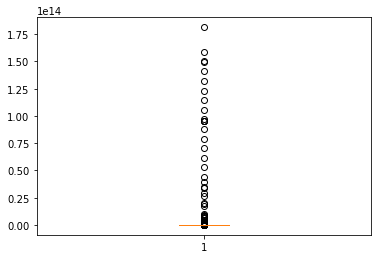

<Figure size 720x504 with 0 Axes>

742.8693126327064 2727.555308680198 -243.92194185062795
row counts: 116185


In [4]:
df_train = pd.read_csv("../data/train_data.csv")
df_test = pd.read_csv("../data/test_data.csv")
print(f"row counts: {len(df_train)}")
df_train.rename(columns={'Per capita': 'Per capita personal income', 'Per Capita (dollars)': 'Revenue Per Capita (dollars)'}, inplace=True)
df_test.rename(columns={'Per capita': 'Per capita personal income',  'Per Capita (dollars)': 'Revenue Per Capita (dollars)'}, inplace=True)
# df_train.iloc[:,-17:].describe()
df_train.describe()

plt.boxplot(df_train.Zori)
fig = plt.figure(figsize =(10, 7))
plt.show()

zoriArr = pd.concat([df_train.Zori, df_test.Zori], ignore_index=True)

# finding the 1st quartile
q1 = np.quantile(zoriArr, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(zoriArr, 0.75)
med = np.median(zoriArr)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

df_train = df_train[(df_train.Zori < upper_bound) & (df_train.Zori > lower_bound)]
df_test = df_test[(df_test.Zori < upper_bound) & (df_test.Zori > lower_bound)]
print(f"row counts: {len(df_train)}")
df_train.describe()

# X_train_2 = df_train.iloc[:, -17:]
X_train = df_train.drop(['Zori', 'State'], axis=1)
y_train = df_train['Zori']

# X_test_2 = df_test.iloc[:, -17:]
X_test = df_test.drop(['Zori', 'State'], axis=1)
y_test = df_test['Zori']

In [121]:
X_test.describe()

,CityID,Year,Month,Ada,Adams,Alameda,Allegheny,Anne Arundel,Anoka,Arapahoe,...,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,GDP,state_personal_consumption,Per capita personal income,Personal income,Unemployment Rates
count,26610.000000,26610.0,26610.000000,26610.000000,26610.000000,26610.000000,26610.000000,26610.000000,26610.000000,26610.000000,...,26610.000000,26610.000000,26610.000000,26610.000000,26610.000000,2.661000e+04,2.661000e+04,26610.000000,2.661000e+04,26610.000000
mean,66324.229763,2019.0,5.990455,0.002480,0.004547,0.002104,0.009508,0.005374,0.002894,0.002894,...,34823.341338,298903.853025,46261.223412,219282.439196,33360.190417,8.532807e+05,6.488567e+05,57089.209395,8.322878e+11,3.610011
std,141610.224667,0.0,3.162501,0.049741,0.067280,0.045827,0.097045,0.073111,0.053716,0.053716,...,30573.944650,265635.152159,44086.431935,183544.962786,40373.820709,7.571811e+05,5.258622e+05,7823.246744,6.920397e+11,0.566143
min,3304.000000,2019.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,828.000000,9097.000000,1394.000000,6981.000000,722.000000,3.819180e+04,2.483900e+04,38826.000000,3.521290e+10,1.900000
25%,16948.000000,2019.0,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,14037.000000,118637.000000,16399.000000,91225.000000,11260.000000,3.420315e+05,2.734034e+05,49862.000000,3.403815e+11,3.200000
50%,32168.000000,2019.0,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,23568.000000,179670.000000,28065.000000,143937.000000,18031.000000,5.610030e+05,4.584683e+05,56650.000000,5.848389e+11,3.500000
75%,46803.000000,2019.0,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55472.000000,460966.000000,63338.000000,358537.000000,39091.000000,9.683930e+05,9.669428e+05,63473.000000,1.135182e+12,4.100000
max,839919.000000,2019.0,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,105544.000000,921177.000000,152551.000000,626865.000000,141761.000000,2.776155e+06,1.921463e+06,75247.000000,2.584684e+12,5.600000


## Train model 

In [5]:
def train(model):
    model.fit(X_train, y_train)
    print("R-squared:", model.score(X_train, y_train))
    score = model.score(X_test, y_test)
    print("R-squared:", score)
    return score

In [6]:
def evaluate(model):
    pass

In [28]:
name = []
r2 = []

print("DummyRegressor")
dummyRegressor = DummyRegressor()
name = np.append(name, "DummyRegressor")
r2 = np.append(r2, train(dummyRegressor))

# Ensemble
print("AdaBoostRegressor")
adaBoostRegressor = AdaBoostRegressor()
name = np.append(name, "AdaBoostRegressor")
r2 = np.append(r2, train(adaBoostRegressor))
print("BaggingRegressor")
baggingRegressor = BaggingRegressor()
name = np.append(name, "BaggingRegressor")
r2 = np.append(r2, train(baggingRegressor))
print("ExtraTreesRegressor")
extraTreesRegressor = ExtraTreesRegressor()
name = np.append(name, "ExtraTreesRegressor")
r2 = np.append(r2, train(extraTreesRegressor))
print("GradientBoostingRegressor")
gradientBoostingRegressor = GradientBoostingRegressor()
name = np.append(name, "GradientBoostingRegressor")
r2 = np.append(r2, train(gradientBoostingRegressor))
print("RandomForestRegressor")
randomForestRegressor = RandomForestRegressor()
name = np.append(name, "RandomForestRegressor")
r2 = np.append(r2, train(randomForestRegressor))
print("histGradientBoostingRegressor")
histGradientBoostingRegressor = HistGradientBoostingRegressor()
name = np.append(name, "histGradientBoostingRegressor")
r2 = np.append(r2, train(histGradientBoostingRegressor))

# Linear
## Classical linear regressors
print("LinearRegression")
linearRegression = LinearRegression()
name = np.append(name, "LinearRegression")
r2 = np.append(r2, train(linearRegression))
print("Ridge")
ridge = Ridge()
name = np.append(name, "Ridge")
r2 = np.append(r2, train(ridge))
print("SGDRegressor")
sGDRegressor = SGDRegressor()
name = np.append(name, "SGDRegressor")
r2 = np.append(r2, train(sGDRegressor))

## Regressors with variable selection
print("ElasticNet")
elasticNet = ElasticNet()
name = np.append(name, "ElasticNet")
r2 = np.append(r2, train(elasticNet))
print("Lasso")
lasso = Lasso()
name = np.append(name, "Lasso")
r2 = np.append(r2, train(lasso))

## Bayesian regressors
print("ARDRegression")
aRDRegression = ARDRegression()
name = np.append(name, "ARDRegression")
r2 = np.append(r2, train(aRDRegression))
print("BayesianRidge")
bayesianRidge = BayesianRidge()
name = np.append(name, "BayesianRidge")
r2 = np.append(r2, train(bayesianRidge))

## Outlier-robust regressors
print("HuberRegressor")
huberRegressor = HuberRegressor()
name = np.append(name, "HuberRegressor")
r2 = np.append(r2, train(huberRegressor))
print("TheilSenRegressor")
theilSenRegressor = TheilSenRegressor()
name = np.append(name, "TheilSenRegressor")
r2 = np.append(r2, train(theilSenRegressor))

## Generalized linear models (GLM) for regression
print("TweedieRegressor")
tweedieRegressor = TweedieRegressor()
name = np.append(name, "TweedieRegressor")
r2 = np.append(r2, train(tweedieRegressor))


## Miscellaneous
print("PassiveAggressiveRegressor")
passiveAggressiveRegressor = PassiveAggressiveRegressor()
name = np.append(name, "PassiveAggressiveRegressor")
r2 = np.append(r2, train(passiveAggressiveRegressor))


# Nearest Neighbors
print("KNeighborsRegressor")
kNeighborsRegressor = KNeighborsRegressor()
name = np.append(name, "KNeighborsRegressor")
r2 = np.append(r2, train(kNeighborsRegressor))

# SVM
print("LinearSVR")
linearSVR = LinearSVR()
name = np.append(name, "LinearSVR")
r2 = np.append(r2, train(linearSVR))

# Decision Trees
print("DecisionTreeRegressor")
decisionTreeRegressor = DecisionTreeRegressor()
name = np.append(name, "DecisionTreeRegressor")
r2 = np.append(r2, train(decisionTreeRegressor))
print("ExtraTreeRegressor")
extraTreeRegressor = ExtraTreeRegressor()
name = np.append(name, "ExtraTreeRegressor")
r2 = np.append(r2, train(extraTreeRegressor))

DummyRegressor
R-squared: 0.0
R-squared: -0.08411401876261237
AdaBoostRegressor
R-squared: 0.17140324329727963
R-squared: 0.0913527677150745
BaggingRegressor
R-squared: 0.9984994415125725
R-squared: 0.8932079761036457
ExtraTreesRegressor
R-squared: 1.0
R-squared: 0.9086047352467688
GradientBoostingRegressor
R-squared: 0.33643831521392864
R-squared: 0.3055654603331739
RandomForestRegressor
R-squared: 0.9992285105946167
R-squared: 0.9016609335302068
histGradientBoostingRegressor
R-squared: 0.5703582259037263
R-squared: 0.5229347640779929
LinearRegression
R-squared: 0.377722269876104
R-squared: 0.37685543483703565
Ridge
R-squared: 0.37853155506245495
R-squared: 0.37685600017321697
SGDRegressor
R-squared: -7.306282315144188e+58
R-squared: -9.011634069541561e+58
ElasticNet


/Users/alberthsieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.545e+10, tolerance: 3.812e+06
  model = cd_fast.enet_coordinate_descent(


R-squared: 0.19188032216826378
R-squared: 0.1905639467539103
Lasso


/Users/alberthsieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.442e+10, tolerance: 3.812e+06
  model = cd_fast.enet_coordinate_descent(


R-squared: 0.30323690193995334
R-squared: 0.3022043532935176
ARDRegression
R-squared: 0.0
R-squared: -0.08411401876261237
BayesianRidge
R-squared: 0.3784881326344517
R-squared: 0.37686064724072466
HuberRegressor
R-squared: -1.0604104355483024
R-squared: -1.5967016754991472
TheilSenRegressor
R-squared: 0.3464582416550658
R-squared: 0.34691418579903477
TweedieRegressor
R-squared: 0.11283265067736337
R-squared: 0.13152368224105504
PassiveAggressiveRegressor
R-squared: -4.579024542097789
R-squared: -5.706828920625821
KNeighborsRegressor
R-squared: 0.16381756770025668
R-squared: -0.2917482090377814
LinearSVR


/Users/alberthsieh/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


R-squared: -4.237533916401155
R-squared: -5.731333814126098
DecisionTreeRegressor
R-squared: 1.0
R-squared: 0.8321347418172088
ExtraTreeRegressor
R-squared: 1.0
R-squared: 0.6416532398391428


In [47]:
temp = r2
temp

array([-8.41140188e-02,  9.13527677e-02,  8.93207976e-01,  9.08604735e-01,
        3.05565460e-01,  9.01660934e-01,  5.22934764e-01,  3.76855435e-01,
        3.76856000e-01, -9.01163407e+58,  1.90563947e-01,  3.02204353e-01,
       -8.41140188e-02,  3.76860647e-01, -1.59670168e+00,  3.46914186e-01,
        1.31523682e-01, -5.70682892e+00, -2.91748209e-01, -5.73133381e+00,
        8.32134742e-01,  6.41653240e-01])

['DummyRegressor' 'AdaBoostRegressor' 'BaggingRegressor'
 'ExtraTreesRegressor' 'GradientBoostingRegressor' 'RandomForestRegressor'
 'histGradientBoostingRegressor' 'LinearRegression' 'Ridge' 'SGDRegressor'
 'ElasticNet' 'Lasso' 'ARDRegression' 'BayesianRidge' 'HuberRegressor'
 'TheilSenRegressor' 'TweedieRegressor' 'PassiveAggressiveRegressor'
 'KNeighborsRegressor' 'LinearSVR' 'DecisionTreeRegressor'
 'ExtraTreeRegressor']
[-0.08411402  0.09135277  0.89320798  0.90860474  0.30556546  0.90166093
  0.52293476  0.37685543  0.376856   -0.          0.19056395  0.30220435
 -0.08411402  0.37686065 -0.59670168  0.34691419  0.13152368 -0.70682892
 -0.29174821 -0.73133381  0.83213474  0.64165324]


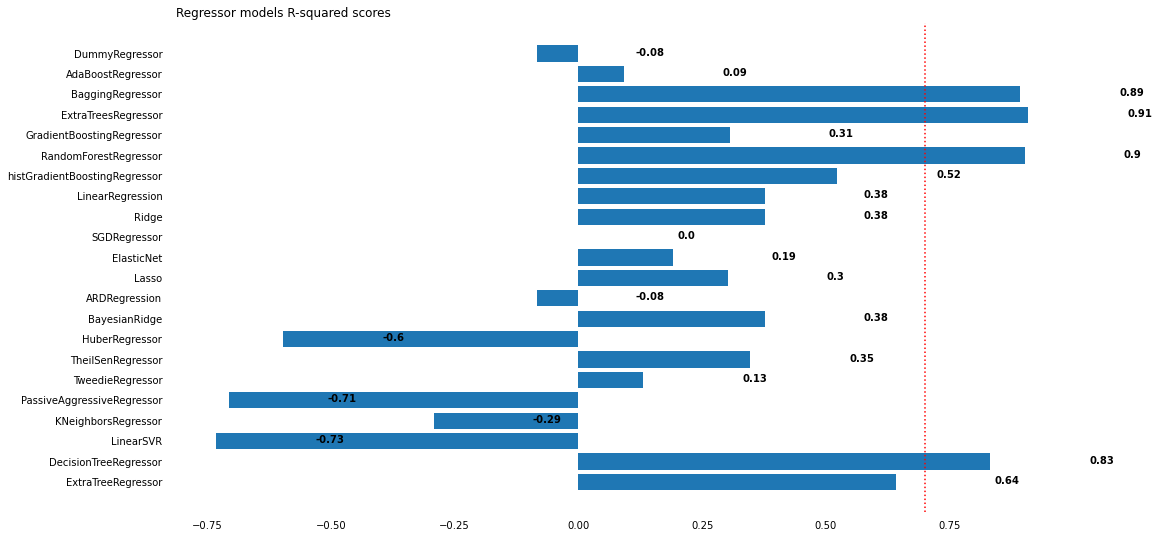

In [49]:
# r2.round(1)
# r2.divide(10)
t = r2
temp = np.fmod(t, 1)
print(name)
print(temp)

fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name, temp)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
# ax.grid(b = True, color ='grey',
#         linestyle ='-.', linewidth = 0.5,
#         alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold')

plt.axvline(0.7, color='red', ls='dotted')
    
# Add Plot Title
ax.set_title('Regressor models R-squared scores',
             loc ='left', )
 
# Show Plot
plt.savefig('regressor-models.png')

## Evaluation

In [70]:
def evaluation(model, param_range, param_name, model_name):
    start = time.time()
    train_scores, test_scores = validation_curve(
        model,
        X_train,
        y_train,
        param_range=param_range,
        param_name=param_name
    )
#     train_scores = [[1.,1.,1.,1.,1.],[1.,1.,1.,1.,1.],[1.,1.,1.,1.,1.],[1.,1.,1.,1.,1.],[1.,1.,1.,1.,1.],[1.,1.,1.,1.,1.]]
#     test_scores = [[0.68723291,0.76098983,0.785781,0.7124321 ,0.54128047],[0.9109307,0.94616248,0.93507611,0.92668769,0.83329381],[0.91541874,0.95193483,0.94423849,0.94297929,0.8911218 ],[0.91612034,0.95491317,0.94756716,0.94454123,0.89357759],[0.91856803,0.95019801,0.94581697,0.94142285,0.8892346],[0.92251423,0.95266294,0.945508,0.94311188,0.89363668]]
    print(time.time()-start)
    print(train_scores)
    print(test_scores)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title('Validation Curve with ' + model_name)
    plt.xlabel(r"$\gamma$")
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(
        param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
    )
    plt.fill_between(
        param_range,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.2,
        color="darkorange",
        lw=lw,
    )
    plt.semilogx(
        param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
    )
    plt.fill_between(
        param_range,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.2,
        color="navy",
        lw=lw,
    )
    plt.legend(loc="best")
    plt.savefig(model_name + '_validation_curve.png')
    print(time.time()-start)

In [107]:
def correlation(model, model_name):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f"    Root Mean Squared Error: {mean_squared_error(y_test, y_pred, squared=False)}")
    print(f"    Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
#     print(f"y_test = \n{y_test.iloc[:5]}")
#     print(f"y_pred = {y_pred[:5]}")
    
    
    plt.scatter(y_test, y_pred, marker='.')
    xymin = min(np.min(y_test), np.min(y_pred))
    xymax = max(np.max(y_test), np.max(y_pred))
    plt.plot([xymin, xymax],[xymin, xymax], color="r", linestyle="--")
    plt.xlabel("y_test")
    plt.ylabel("y_pred")
    plt.title(model_name)
    plt.savefig(model_name + 'correlation.png')

In [122]:
def kf(model):
    kfold = KFold(5, shuffle=True, random_state=2)
    mse, mae, r2 = [], [], []
    X_np = np.concatenate((X_train.to_numpy(), X_test.to_numpy()))
    y_np = np.concatenate((y_train.to_numpy(), y_test.to_numpy()))
    for train_idx, test_idx in kfold.split(X_train):
        X_train1, X_test1 = X_np[train_idx], X_np[test_idx]
        y_train1, y_test1 = y_np[train_idx], y_np[test_idx]

        start = time.time()
        model.fit(X_train1, y_train1)
        print(time.time()-start)

        y_pred1 = model.predict(X_test1)

        mse += [mean_squared_error(y_pred1, y_test1)]
        mae += [mean_absolute_error(y_pred1, y_test1)]
        r2 += [r2_score(y_pred1, y_test1)]

    print("mean_squared_error")
    print("mean: %.5f" % np.mean(mse))
    print("std: %.5f" %  np.std(mse))
    print("mean_absolute_error")
    print("mean: %.5f" % np.mean(mae))
    print("std: %.5f" %  np.std(mae))
    print("r2")
    print("mean: %.5f" % np.mean(r2))
    print("std: %.5f" %  np.std(r2))

###  ExtraTreesRegressor

3.0994415283203125e-06
[[1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0]]
[[0.68723291, 0.76098983, 0.785781, 0.7124321, 0.54128047], [0.9109307, 0.94616248, 0.93507611, 0.92668769, 0.83329381], [0.91541874, 0.95193483, 0.94423849, 0.94297929, 0.8911218], [0.91612034, 0.95491317, 0.94756716, 0.94454123, 0.89357759], [0.91856803, 0.95019801, 0.94581697, 0.94142285, 0.8892346], [0.92251423, 0.95266294, 0.945508, 0.94311188, 0.89363668]]
0.30000782012939453


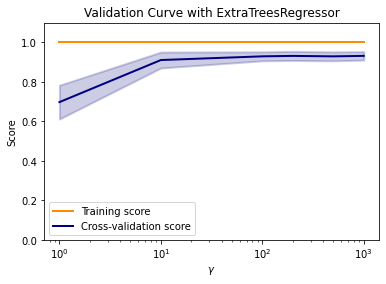

In [69]:
evaluation(ExtraTreesRegressor(), [1, 10, 100, 200, 500, 1000], 'n_estimators', 'ExtraTreesRegressor')

    Root Mean Squared Error: 164.58014175393083
    Mean Absolute Error: 120.0134716796587


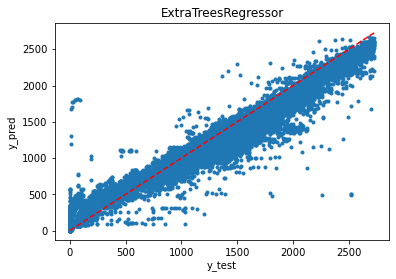

In [110]:
correlation(ExtraTreesRegressor(n_estimators=100), 'ExtraTreesRegressor')

In [123]:
kf(ExtraTreesRegressor(n_estimators=100))

206.64117193222046
193.325581073761
197.1453559398651
205.0211079120636
223.36829113960266
mean_squared_error
mean: 15128.42455
std: 757.72866
mean_absolute_error
mean: 60.22658
std: 1.16351
r2
mean: 0.94799
std: 0.00256


### RandomForestRegressor

9284.282412052155
[[0.99253181 0.99284517 0.99267509 0.9913916  0.99335017]
 [0.99860912 0.9986432  0.99832521 0.99849494 0.99867935]
 [0.99917257 0.99926973 0.99910455 0.99914145 0.99926584]
 [0.99923023 0.99930313 0.99912816 0.99919325 0.99930753]
 [0.99925239 0.99931801 0.99916399 0.99922603 0.99931341]
 [0.99926077 0.99933221 0.99916217 0.99922806 0.99932468]]
[[0.79679455 0.81252966 0.85427859 0.76853371 0.41210425]
 [0.89474168 0.90978731 0.94272735 0.92537622 0.83298045]
 [0.85433315 0.94599142 0.9570775  0.92601692 0.8769475 ]
 [0.8611337  0.94409687 0.95012935 0.92655926 0.87909595]
 [0.8611414  0.94121177 0.95369414 0.92740434 0.87995412]
 [0.86858275 0.94352145 0.95569434 0.92928758 0.8773296 ]]
9285.133231163025


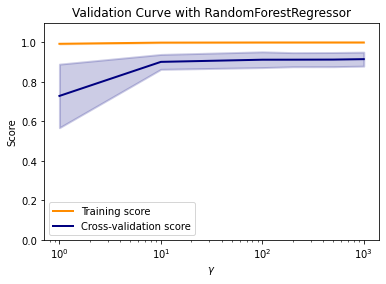

In [71]:
evaluation(RandomForestRegressor(), [1, 10, 100, 200, 500, 1000], 'n_estimators', 'RandomForestRegressor')

    Root Mean Squared Error: 172.36227946275093
    Mean Absolute Error: 116.18142063569634


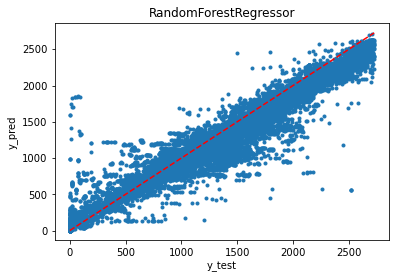

In [112]:
correlation(RandomForestRegressor(n_estimators=100), 'RandomForestRegressor')

In [124]:
kf(RandomForestRegressor(n_estimators=100))

153.4017481803894
151.90275502204895
147.20388317108154
148.1138949394226
147.92357873916626
mean_squared_error
mean: 2517.68171
std: 148.56248
mean_absolute_error
mean: 25.34104
std: 0.26383
r2
mean: 0.99211
std: 0.00042


## DecisionTreeRegressor

1338.377622127533
[[1.         1.         1.         1.         1.        ]
 [0.99281199 0.99293641 0.99288603 0.9926144  0.99296968]
 [0.96582005 0.96285301 0.96235531 0.96260729 0.96707986]
 [0.74150035 0.70369937 0.69162183 0.7120898  0.75945953]
 [0.59401459 0.48994163 0.47458242 0.52604456 0.58190078]
 [0.37030335 0.32181421 0.30535862 0.3106847  0.34260203]]
[[0.74880859 0.83570521 0.85424702 0.85396954 0.70239129]
 [0.75172422 0.84360008 0.85325392 0.85633463 0.66542279]
 [0.7455243  0.82561657 0.77640576 0.83090969 0.61479131]
 [0.53249991 0.60477042 0.64879989 0.64196611 0.50596502]
 [0.41362157 0.4304949  0.49664932 0.52425083 0.37330386]
 [0.25950801 0.28689902 0.31546751 0.32745563 0.22603135]]
1338.9401710033417


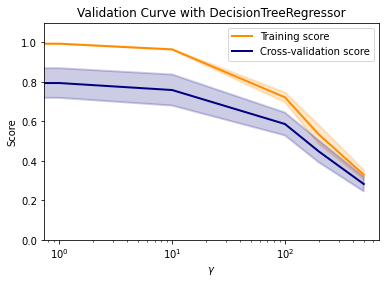

In [73]:
evaluation(DecisionTreeRegressor(), [0.0, 1.0, 10.0, 100.0, 200.0, 500.0], 'ccp_alpha', 'DecisionTreeRegressor')

    Root Mean Squared Error: 220.9092347545669
    Mean Absolute Error: 117.38292606217419


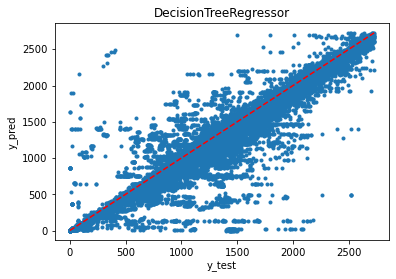

In [114]:
correlation(DecisionTreeRegressor(), 'DecisionTreeRegressor')

In [125]:
kf(DecisionTreeRegressor())

2.3809051513671875
2.4363491535186768
2.264845132827759
2.3755221366882324
2.413304090499878
mean_squared_error
mean: 3768.24173
std: 217.51809
mean_absolute_error
mean: 26.90399
std: 0.31530
r2
mean: 0.98849
std: 0.00069


In [90]:
kfold = KFold(5, shuffle=True, random_state=2)
prec, rec, f1 = [], [], []
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
for train_idx, test_idx in kfold.split(X_train):
    X_train1, X_test1 = X_train_np[train_idx], X_train_np[test_idx]
    y_train1, y_test1 = y_train_np[train_idx], y_train_np[test_idx]
    
#     mlp_clf = MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1000, solver='lbfgs', activation='relu')
#     X_scaler = MinMaxScaler()
    tree = ExtraTreesRegressor()
    
#     X_train = X_scaler.fit_transform(X_train1)
    start = time.time()
    tree.fit(X_train1, y_train1)
    print(time.time()-start)
    
#     X_test1 = X_scaler.fit_transform(X_test1)
    y_pred1 = tree.predict(X_test1)
    
#     rec += [recall_score(y_pred1, y_test1, average='weighted')]
#     prec += [precision_score(y_pred1, y_test1, average='weighted')]
    f1 += [r2_score(y_pred1, y_test1)]
    
# print("recall")
# print("mean: %.5f" % np.mean(rec))
# print("std: %.5f" %  np.std(rec))
# print("precision")
# print("mean: %.5f" % np.mean(prec))
# print("std: %.5f" %  np.std(prec))
print("f1")
print("mean: %.5f" % np.mean(f1))
print("std: %.5f" %  np.std(f1))

197.09012079238892
200.2691900730133
198.1836678981781
200.24640011787415
192.31037282943726
f1
mean: 0.94753
std: 0.00322
